In [1]:
import pandas as pd
import os

In [17]:
df = pd.read_csv('./Missing Assembly Zones - EPSG 32635  UTM zone 35N - Missing Assembly Zones - EPSG 32635  UTM zone 35N.csv')
df.head()

,field_1,tesis_adi,il_adi,sokak_adi,ilce_adi,mahalle_ad,lng,lat,id,Area_m2
0,46,Hacet Deresi Mesire Alan?,?STANBUL,ALPEREN,TUZLA,AYDINLI,29.335061,40.872282,151349502,NaN
1,125,Pendik Veterinerlik Enstitüsü,?STANBUL,SAH?L,PEND?K,BATI,29.222570,40.875783,151350279,NaN
2,167,Havaalan? Bölge Park?,?STANBUL,ANADOLU,ESENLER,HAVAALANI,28.867513,41.061662,151347276,NaN
3,309,Belediye Binas? Önü,?STANBUL,ÇAVU?DERE,ÜSKÜDAR,M?MAR S?NAN,29.022241,41.017829,151350917,NaN
4,755,Sadabad Anadolu Lisesi Bahçesi,?STANBUL,?EH?T CEVAT BAYRAKTAR,KA?ITHANE,TELS?ZLER,28.995732,41.078427,151348213,NaN


In [18]:
df[df['tesis_adi']=='Kıvırcık Ali Parkı']

,field_1,tesis_adi,il_adi,sokak_adi,ilce_adi,mahalle_ad,lng,lat,id,Area_m2


In [5]:
import requests

def get_polygon_bounds(zone_name, city, district):
    # Overpass API endpoint
    url = "http://overpass-api.de/api/interpreter"
    
    # Overpass QL query
    query = f"""
    [out:json];
    area[name="{city}"]->.city;
    area[name="{district}"]->.district;
    (node["name"="{zone_name}"](area.district);
     way["name"="{zone_name}"](area.district);
     relation["name"="{zone_name}"](area.district);
    );
    out geom;
    """
    
    # Send request to Overpass API
    response = requests.get(url, params={'data': query})
    
    if response.status_code == 200:
        data = response.json()
        return data
    else:
        print(f"Error: {response.status_code}")
        return None

# Example Usage
zone_name = "Pendik Veterinerlik Enstitüsü"
city = "Istanbul"
district = "Pendik"

bounds = get_polygon_bounds(zone_name, city, district)
print(bounds)


{'version': 0.6, 'generator': 'Overpass API 0.7.62.4 2390de5a', 'osm3s': {'timestamp_osm_base': '2025-01-26T13:59:30Z', 'timestamp_areas_base': '2025-01-26T07:51:25Z', 'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'}, 'elements': []}


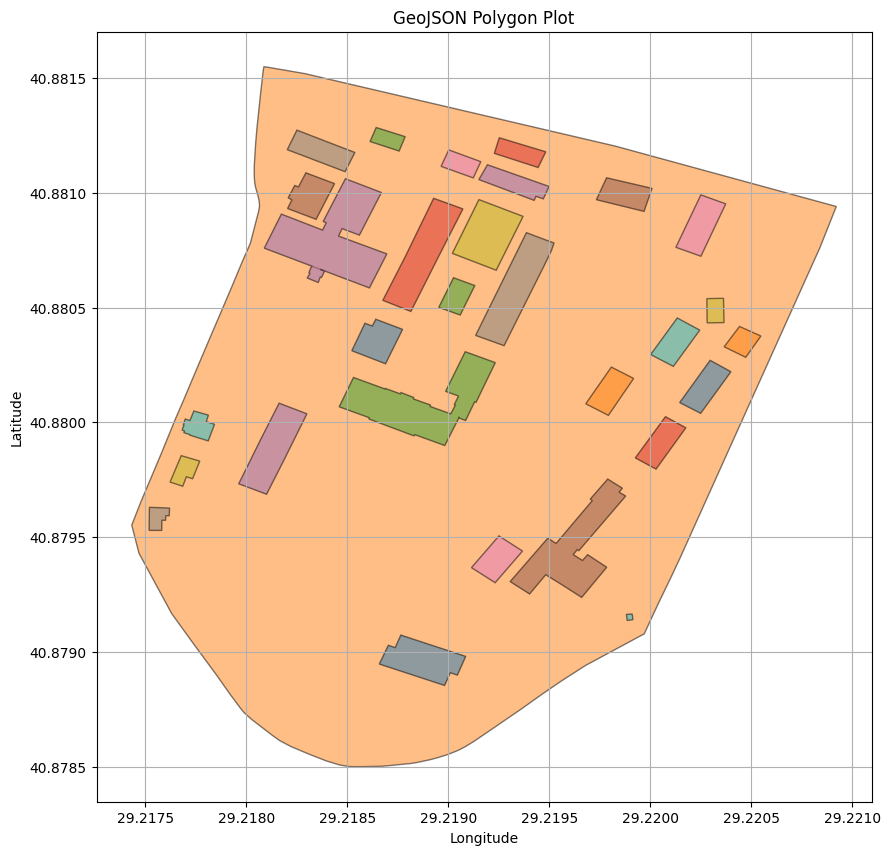

In [6]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, MultiPolygon

# Your GeoJSON data
geojson_data = {
   "features":[
      {
         "geometry":{
            "coordinates":[
               [
                  [
                     [
                        29.21836435,
                        40.880666582
                     ],
                     [
                        29.21832438,
                        40.880679875
                     ],
                     [
                        29.218324414,
                        40.880679916
                     ],
                     [
                        29.21836435,
                        40.880666582
                     ]
                  ]
               ],
               [
                  [
                     [
                        29.218288531,
                        40.881518669
                     ],
                     [
                        29.219826281,
                        40.881202793
                     ],
                     [
                        29.22091994,
                        40.880939947
                     ],
                     [
                        29.220838409,
                        40.880759726
                     ],
                     [
                        29.220145132,
                        40.879406704
                     ],
                     [
                        29.220100142,
                        40.879322456
                     ],
                     [
                        29.220040332,
                        40.879213811
                     ],
                     [
                        29.219970985,
                        40.879082428
                     ],
                     [
                        29.219966621,
                        40.879076789
                     ],
                     [
                        29.219959876,
                        40.879074623
                     ],
                     [
                        29.21967993,
                        40.878942045
                     ],
                     [
                        29.219561249,
                        40.878875151
                     ],
                     [
                        29.219464738,
                        40.878817117
                     ],
                     [
                        29.21936266,
                        40.878753084
                     ],
                     [
                        29.219230922,
                        40.878673649
                     ],
                     [
                        29.219124761,
                        40.878609995
                     ],
                     [
                        29.219083281,
                        40.878587885
                     ],
                     [
                        29.219053631,
                        40.878574125
                     ],
                     [
                        29.219023756,
                        40.878562919
                     ],
                     [
                        29.218987149,
                        40.878551007
                     ],
                     [
                        29.218947422,
                        40.878540017
                     ],
                     [
                        29.218909151,
                        40.878531028
                     ],
                     [
                        29.218845384,
                        40.878519026
                     ],
                     [
                        29.21881363,
                        40.878514392
                     ],
                     [
                        29.218750026,
                        40.878509148
                     ],
                     [
                        29.218740535,
                        40.878508054
                     ],
                     [
                        29.218671161,
                        40.878502393
                     ],
                     [
                        29.218546431,
                        40.878500429
                     ],
                     [
                        29.218505688,
                        40.878501436
                     ],
                     [
                        29.218459254,
                        40.878508446
                     ],
                     [
                        29.218393721,
                        40.878526175
                     ],
                     [
                        29.218315653,
                        40.878552983
                     ],
                     [
                        29.218221905,
                        40.878587458
                     ],
                     [
                        29.218164564,
                        40.878614136
                     ],
                     [
                        29.218130764,
                        40.878635156
                     ],
                     [
                        29.2180661,
                        40.878678888
                     ],
                     [
                        29.218026815,
                        40.878705629
                     ],
                     [
                        29.217988075,
                        40.878735852
                     ],
                     [
                        29.217968717,
                        40.878756952
                     ],
                     [
                        29.217921569,
                        40.878812559
                     ],
                     [
                        29.217850949,
                        40.878900518
                     ],
                     [
                        29.217733368,
                        40.87904106
                     ],
                     [
                        29.217629581,
                        40.879167519
                     ],
                     [
                        29.217467811,
                        40.879429983
                     ],
                     [
                        29.217432061,
                        40.87955267
                     ],
                     [
                        29.217476718,
                        40.879652617
                     ],
                     [
                        29.217575695,
                        40.879858818
                     ],
                     [
                        29.217649774,
                        40.880018216
                     ],
                     [
                        29.217686996,
                        40.880093481
                     ],
                     [
                        29.217753011,
                        40.88023128
                     ],
                     [
                        29.217801535,
                        40.880331532
                     ],
                     [
                        29.217865336,
                        40.880462711
                     ],
                     [
                        29.217928335,
                        40.880592467
                     ],
                     [
                        29.217980795,
                        40.880703022
                     ],
                     [
                        29.218019119,
                        40.880779789
                     ],
                     [
                        29.218060457,
                        40.880920067
                     ],
                     [
                        29.218064694,
                        40.880942726
                     ],
                     [
                        29.218062581,
                        40.880964817
                     ],
                     [
                        29.218057334,
                        40.880984962
                     ],
                     [
                        29.218052231,
                        40.881000955
                     ],
                     [
                        29.21804446,
                        40.881025284
                     ],
                     [
                        29.218040664,
                        40.881044141
                     ],
                     [
                        29.21803844,
                        40.881074116
                     ],
                     [
                        29.218038445,
                        40.881114405
                     ],
                     [
                        29.218045523,
                        40.88121624
                     ],
                     [
                        29.218048781,
                        40.881249844
                     ],
                     [
                        29.218052151,
                        40.881284598
                     ],
                     [
                        29.218062241,
                        40.881368389
                     ],
                     [
                        29.21807154,
                        40.881445071
                     ],
                     [
                        29.218080418,
                        40.881513797
                     ],
                     [
                        29.218084184,
                        40.881539562
                     ],
                     [
                        29.218086625,
                        40.881548593
                     ],
                     [
                        29.218101659,
                        40.881546947
                     ],
                     [
                        29.218288531,
                        40.881518669
                     ]
                  ],
                  [
                     [
                        29.218642137,
                        40.881283882
                     ],
                     [
                        29.218611635,
                        40.881222791
                     ],
                     [
                        29.218755891,
                        40.881181438
                     ],
                     [
                        29.218785691,
                        40.881244055
                     ],
                     [
                        29.218642137,
                        40.881283882
                     ]
                  ],
                  [
                     [
                        29.21925134,
                        40.881239367
                     ],
                     [
                        29.219227027,
                        40.881171302
                     ],
                     [
                        29.219443855,
                        40.881109628
                     ],
                     [
                        29.219481805,
                        40.881178154
                     ],
                     [
                        29.21925134,
                        40.881239367
                     ]
                  ],
                  [
                     [
                        29.219498062,
                        40.881027315
                     ],
                     [
                        29.21919295,
                        40.881121704
                     ],
                     [
                        29.21915039,
                        40.881057088
                     ],
                     [
                        29.219424003,
                        40.880966651
                     ],
                     [
                        29.21943329,
                        40.880984186
                     ],
                     [
                        29.219469435,
                        40.880973173
                     ],
                     [
                        29.219498062,
                        40.881027315
                     ]
                  ],
                  [
                     [
                        29.219732163,
                        40.880969437
                     ],
                     [
                        29.219968189,
                        40.880918618
                     ],
                     [
                        29.220007819,
                        40.881018951
                     ],
                     [
                        29.219782647,
                        40.881064986
                     ],
                     [
                        29.219732163,
                        40.880969437
                     ]
                  ],
                  [
                     [
                        29.220249445,
                        40.880990518
                     ],
                     [
                        29.220125776,
                        40.880762179
                     ],
                     [
                        29.220249743,
                        40.880723298
                     ],
                     [
                        29.220372728,
                        40.880951542
                     ],
                     [
                        29.220249445,
                        40.880990518
                     ]
                  ],
                  [
                     [
                        29.21939685,
                        40.880822367
                     ],
                     [
                        29.219385846,
                        40.880825985
                     ],
                     [
                        29.219234186,
                        40.880556295
                     ],
                     [
                        29.219134394,
                        40.880378552
                     ],
                     [
                        29.219275261,
                        40.880333933
                     ],
                     [
                        29.219364822,
                        40.880491162
                     ],
                     [
                        29.219472509,
                        40.880680126
                     ],
                     [
                        29.219509907,
                        40.880748516
                     ],
                     [
                        29.219522684,
                        40.880780885
                     ],
                     [
                        29.219506324,
                        40.880786301
                     ],
                     [
                        29.219504912,
                        40.880786598
                     ],
                     [
                        29.21939685,
                        40.880822367
                     ]
                  ],
                  [
                     [
                        29.220279018,
                        40.880538773
                     ],
                     [
                        29.220280551,
                        40.880433137
                     ],
                     [
                        29.220364018,
                        40.880434422
                     ],
                     [
                        29.220361505,
                        40.880540141
                     ],
                     [
                        29.220279018,
                        40.880538773
                     ]
                  ],
                  [
                     [
                        29.220244221,
                        40.88040155
                     ],
                     [
                        29.220132617,
                        40.880454473
                     ],
                     [
                        29.220000993,
                        40.88029525
                     ],
                     [
                        29.220113267,
                        40.880243681
                     ],
                     [
                        29.220244221,
                        40.88040155
                     ]
                  ],
                  [
                     [
                        29.220295382,
                        40.880270131
                     ],
                     [
                        29.220144575,
                        40.880086099
                     ],
                     [
                        29.220248474,
                        40.880039158
                     ],
                     [
                        29.220398336,
                        40.88022039
                     ],
                     [
                        29.220295382,
                        40.880270131
                     ]
                  ],
                  [
                     [
                        29.21991668,
                        40.880191105
                     ],
                     [
                        29.219806389,
                        40.880240615
                     ],
                     [
                        29.219679569,
                        40.880080792
                     ],
                     [
                        29.219791632,
                        40.880030394
                     ],
                     [
                        29.21991668,
                        40.880191105
                     ]
                  ],
                  [
                     [
                        29.219084822,
                        40.880008141
                     ],
                     [
                        29.219129574,
                        40.880089142
                     ],
                     [
                        29.219136546,
                        40.880087118
                     ],
                     [
                        29.219231892,
                        40.880260146
                     ],
                     [
                        29.219159788,
                        40.880283075
                     ],
                     [
                        29.219082869,
                        40.880307593
                     ],
                     [
                        29.219069063,
                        40.880283092
                     ],
                     [
                        29.218985757,
                        40.880135001
                     ],
                     [
                        29.21904961,
                        40.880114629
                     ],
                     [
                        29.21902881,
                        40.880077472
                     ],
                     [
                        29.21903364,
                        40.880074532
                     ],
                     [
                        29.219011274,
                        40.88003709
                     ],
                     [
                        29.218908823,
                        40.880069274
                     ],
                     [
                        29.218911786,
                        40.880075238
                     ],
                     [
                        29.218825539,
                        40.880102303
                     ],
                     [
                        29.218828605,
                        40.880107999
                     ],
                     [
                        29.218765127,
                        40.880129725
                     ],
                     [
                        29.218761475,
                        40.880124025
                     ],
                     [
                        29.218687402,
                        40.880147842
                     ],
                     [
                        29.21868616,
                        40.880145311
                     ],
                     [
                        29.218529765,
                        40.880195408
                     ],
                     [
                        29.218458944,
                        40.880067667
                     ],
                     [
                        29.218608655,
                        40.880019867
                     ],
                     [
                        29.21860529,
                        40.8800148
                     ],
                     [
                        29.218829099,
                        40.879941112
                     ],
                     [
                        29.21883305,
                        40.879946362
                     ],
                     [
                        29.218981875,
                        40.879899006
                     ],
                     [
                        29.219053909,
                        40.880023693
                     ],
                     [
                        29.219051128,
                        40.88001881
                     ],
                     [
                        29.219082071,
                        40.880009023
                     ],
                     [
                        29.219084822,
                        40.880008141
                     ]
                  ],
                  [
                     [
                        29.22007434,
                        40.880024831
                     ],
                     [
                        29.219924852,
                        40.879845222
                     ],
                     [
                        29.2200275,
                        40.87979638
                     ],
                     [
                        29.220175322,
                        40.879976248
                     ],
                     [
                        29.22007434,
                        40.880024831
                     ]
                  ],
                  [
                     [
                        29.21818856,
                        40.879840853
                     ],
                     [
                        29.21829919,
                        40.880037223
                     ],
                     [
                        29.218161631,
                        40.880083485
                     ],
                     [
                        29.2180754,
                        40.879934564
                     ],
                     [
                        29.218008773,
                        40.879816307
                     ],
                     [
                        29.217961414,
                        40.879732406
                     ],
                     [
                        29.218099551,
                        40.879686869
                     ],
                     [
                        29.21818856,
                        40.879840853
                     ]
                  ],
                  [
                     [
                        29.219788451,
                        40.879753156
                     ],
                     [
                        29.219701693,
                        40.879665567
                     ],
                     [
                        29.219712042,
                        40.879659332
                     ],
                     [
                        29.219532788,
                        40.879472766
                     ],
                     [
                        29.219491805,
                        40.879495725
                     ],
                     [
                        29.219305242,
                        40.879306588
                     ],
                     [
                        29.21940159,
                        40.87925266
                     ],
                     [
                        29.219481542,
                        40.879336331
                     ],
                     [
                        29.219560832,
                        40.879293187
                     ],
                     [
                        29.219606742,
                        40.879267288
                     ],
                     [
                        29.21965935,
                        40.879237653
                     ],
                     [
                        29.219783566,
                        40.879369087
                     ],
                     [
                        29.219688776,
                        40.879423745
                     ],
                     [
                        29.219663625,
                        40.879398628
                     ],
                     [
                        29.219625504,
                        40.879419714
                     ],
                     [
                        29.219617525,
                        40.879424074
                     ],
                     [
                        29.219637823,
                        40.879445737
                     ],
                     [
                        29.219645412,
                        40.879441195
                     ],
                     [
                        29.21973699,
                        40.879535031
                     ],
                     [
                        29.219877305,
                        40.879679004
                     ],
                     [
                        29.219844513,
                        40.879696164
                     ],
                     [
                        29.219861149,
                        40.879713029
                     ],
                     [
                        29.219788451,
                        40.879753156
                     ]
                  ],
                  [
                     [
                        29.219366609,
                        40.879439488
                     ],
                     [
                        29.219249861,
                        40.879505526
                     ],
                     [
                        29.219113786,
                        40.879367346
                     ],
                     [
                        29.219231117,
                        40.879301763
                     ],
                     [
                        29.219366609,
                        40.879439488
                     ]
                  ],
                  [
                     [
                        29.217580459,
                        40.879529338
                     ],
                     [
                        29.217581206,
                        40.879574015
                     ],
                     [
                        29.217599808,
                        40.879573331
                     ],
                     [
                        29.217600259,
                        40.879593328
                     ],
                     [
                        29.21761758,
                        40.879593446
                     ],
                     [
                        29.217619242,
                        40.879626781
                     ],
                     [
                        29.217557562,
                        40.879628795
                     ],
                     [
                        29.217529659,
                        40.879629686
                     ],
                     [
                        29.217519476,
                        40.879630067
                     ],
                     [
                        29.217518017,
                        40.879529635
                     ],
                     [
                        29.217580459,
                        40.879529338
                     ]
                  ],
                  [
                     [
                        29.217684477,
                        40.879721792
                     ],
                     [
                        29.217702588,
                        40.879762804
                     ],
                     [
                        29.217733221,
                        40.879754545
                     ],
                     [
                        29.217742193,
                        40.87977388
                     ],
                     [
                        29.217751544,
                        40.879794209
                     ],
                     [
                        29.217768822,
                        40.879831252
                     ],
                     [
                        29.217677037,
                        40.879855037
                     ],
                     [
                        29.21762163,
                        40.879739829
                     ],
                     [
                        29.217684477,
                        40.879721792
                     ]
                  ],
                  [
                     [
                        29.217811582,
                        40.880031486
                     ],
                     [
                        29.217739535,
                        40.880049461
                     ],
                     [
                        29.217719868,
                        40.880007627
                     ],
                     [
                        29.217696491,
                        40.880014764
                     ],
                     [
                        29.217687508,
                        40.879988043
                     ],
                     [
                        29.217689966,
                        40.87998707
                     ],
                     [
                        29.217681203,
                        40.879966566
                     ],
                     [
                        29.217693686,
                        40.879962057
                     ],
                     [
                        29.217689755,
                        40.879955095
                     ],
                     [
                        29.217720885,
                        40.87994612
                     ],
                     [
                        29.217719833,
                        40.879944041
                     ],
                     [
                        29.217810651,
                        40.879919349
                     ],
                     [
                        29.217842,
                        40.879991523
                     ],
                     [
                        29.21780105,
                        40.880003314
                     ],
                     [
                        29.217811582,
                        40.880031486
                     ]
                  ],
                  [
                     [
                        29.218704308,
                        40.880283143
                     ],
                     [
                        29.218772754,
                        40.880404924
                     ],
                     [
                        29.218640016,
                        40.880448967
                     ],
                     [
                        29.218622941,
                        40.88041958
                     ],
                     [
                        29.218586394,
                        40.880431492
                     ],
                     [
                        29.218521447,
                        40.880311806
                     ],
                     [
                        29.218605853,
                        40.880283106
                     ],
                     [
                        29.21868849,
                        40.880255026
                     ],
                     [
                        29.218704308,
                        40.880283143
                     ]
                  ],
                  [
                     [
                        29.220364765,
                        40.880329052
                     ],
                     [
                        29.220471588,
                        40.88028321
                     ],
                     [
                        29.22054674,
                        40.880375855
                     ],
                     [
                        29.220440846,
                        40.880417559
                     ],
                     [
                        29.220364765,
                        40.880329052
                     ]
                  ],
                  [
                     [
                        29.219131258,
                        40.880595407
                     ],
                     [
                        29.219024961,
                        40.880629722
                     ],
                     [
                        29.218951806,
                        40.880500524
                     ],
                     [
                        29.219058089,
                        40.88046738
                     ],
                     [
                        29.219127311,
                        40.880589886
                     ],
                     [
                        29.219131258,
                        40.880595407
                     ]
                  ],
                  [
                     [
                        29.218814018,
                        40.88048293
                     ],
                     [
                        29.218946458,
                        40.880714032
                     ],
                     [
                        29.219071546,
                        40.880929503
                     ],
                     [
                        29.219009264,
                        40.880949346
                     ],
                     [
                        29.218932443,
                        40.880973774
                     ],
                     [
                        29.21892645,
                        40.880975714
                     ],
                     [
                        29.218787113,
                        40.88072358
                     ],
                     [
                        29.218674967,
                        40.880531252
                     ],
                     [
                        29.218814018,
                        40.88048293
                     ]
                  ],
                  [
                     [
                        29.21832438,
                        40.880679875
                     ],
                     [
                        29.21831843,
                        40.880672851
                     ],
                     [
                        29.218308705,
                        40.880650899
                     ],
                     [
                        29.218314798,
                        40.880648778
                     ],
                     [
                        29.218300354,
                        40.880628596
                     ],
                     [
                        29.218318439,
                        40.880622144
                     ],
                     [
                        29.218355295,
                        40.880608884
                     ],
                     [
                        29.218365388,
                        40.88063282
                     ],
                     [
                        29.218371484,
                        40.880630429
                     ],
                     [
                        29.218386805,
                        40.880659084
                     ],
                     [
                        29.21836435,
                        40.880666582
                     ],
                     [
                        29.218608758,
                        40.880585293
                     ],
                     [
                        29.218695097,
                        40.880733584
                     ],
                     [
                        29.218455874,
                        40.880811131
                     ],
                     [
                        29.218473402,
                        40.880843583
                     ],
                     [
                        29.218559078,
                        40.880815162
                     ],
                     [
                        29.218668269,
                        40.881000895
                     ],
                     [
                        29.218489735,
                        40.881060929
                     ],
                     [
                        29.218379572,
                        40.88087465
                     ],
                     [
                        29.218394703,
                        40.880869619
                     ],
                     [
                        29.218376781,
                        40.880837344
                     ],
                     [
                        29.218318414,
                        40.880857213
                     ],
                     [
                        29.218172691,
                        40.880906751
                     ],
                     [
                        29.218088115,
                        40.880758472
                     ],
                     [
                        29.218318421,
                        40.880681857
                     ],
                     [
                        29.21832438,
                        40.880679875
                     ]
                  ],
                  [
                     [
                        29.218318386,
                        40.880892788
                     ],
                     [
                        29.21834462,
                        40.88088405
                     ],
                     [
                        29.218436061,
                        40.881039491
                     ],
                     [
                        29.218318354,
                        40.881078501
                     ],
                     [
                        29.218294085,
                        40.881086623
                     ],
                     [
                        29.218257518,
                        40.881025401
                     ],
                     [
                        29.218238951,
                        40.88103131
                     ],
                     [
                        29.218206404,
                        40.88097768
                     ],
                     [
                        29.218224806,
                        40.880969069
                     ],
                     [
                        29.21820333,
                        40.880931186
                     ],
                     [
                        29.218318386,
                        40.880892788
                     ]
                  ],
                  [
                     [
                        29.218963376,
                        40.881114754
                     ],
                     [
                        29.21912281,
                        40.881064407
                     ],
                     [
                        29.219160147,
                        40.88113518
                     ],
                     [
                        29.21900129,
                        40.881186432
                     ],
                     [
                        29.218963376,
                        40.881114754
                     ]
                  ],
                  [
                     [
                        29.218536641,
                        40.881175089
                     ],
                     [
                        29.218318402,
                        40.881249175
                     ],
                     [
                        29.218249716,
                        40.881272486
                     ],
                     [
                        29.218201979,
                        40.881187321
                     ],
                     [
                        29.218318413,
                        40.881148392
                     ],
                     [
                        29.2184882,
                        40.881091541
                     ],
                     [
                        29.218536641,
                        40.881175089
                     ]
                  ],
                  [
                     [
                        29.219019115,
                        40.880735779
                     ],
                     [
                        29.219236267,
                        40.880662405
                     ],
                     [
                        29.219369255,
                        40.880896933
                     ],
                     [
                        29.219358055,
                        40.88090064
                     ],
                     [
                        29.219303719,
                        40.880918826
                     ],
                     [
                        29.219150638,
                        40.880969937
                     ],
                     [
                        29.219019115,
                        40.880735779
                     ]
                  ],
                  [
                     [
                        29.219880907,
                        40.879163857
                     ],
                     [
                        29.219884447,
                        40.879137402
                     ],
                     [
                        29.219913279,
                        40.87914066
                     ],
                     [
                        29.219909771,
                        40.879164413
                     ],
                     [
                        29.219908296,
                        40.879164943
                     ],
                     [
                        29.219880907,
                        40.879163857
                     ]
                  ],
                  [
                     [
                        29.218764136,
                        40.879073619
                     ],
                     [
                        29.218736005,
                        40.879019119
                     ],
                     [
                        29.218702318,
                        40.879029158
                     ],
                     [
                        29.218657379,
                        40.878947526
                     ],
                     [
                        29.218980749,
                        40.878854247
                     ],
                     [
                        29.219009068,
                        40.878909559
                     ],
                     [
                        29.219044028,
                        40.878899348
                     ],
                     [
                        29.219085349,
                        40.878980776
                     ],
                     [
                        29.218764136,
                        40.879073619
                     ]
                  ]
               ]
            ],
            "type":"MultiPolygon"
         },
         "type":"Feature",
         "properties":{
            "tesis_adi":"Pendik Veterinerlik Enstit\u00fcs\u00fc",
            "il_adi":"\u0130STANBUL",
            "sokak_adi":"SAH\u0130L",
            "acik_adres":"Bat\u0131 Mahallesi Yunus Emre Caddesi No:2 Pendik \/ \u0130stanbul",
            "ilce_adi":"PEND\u0130K",
            "mahalle_adi":"BATI",
            "x":29.21902951032375,
            "y":40.879983868188326,
            "tabela_kod":"3424 004 59",
            "id":151350279
         }
      }
   ],
   "type":"FeatureCollection"
}

# Extract coordinates
coordinates = geojson_data["features"][0]["geometry"]["coordinates"]

# Plot polygons
plt.figure(figsize=(10, 10))
for group in coordinates:
    for polygon in group:
        xs, ys = zip(*polygon)
        plt.fill(xs, ys, alpha=0.5, edgecolor='black')

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("GeoJSON Polygon Plot")
plt.grid()
plt.show()


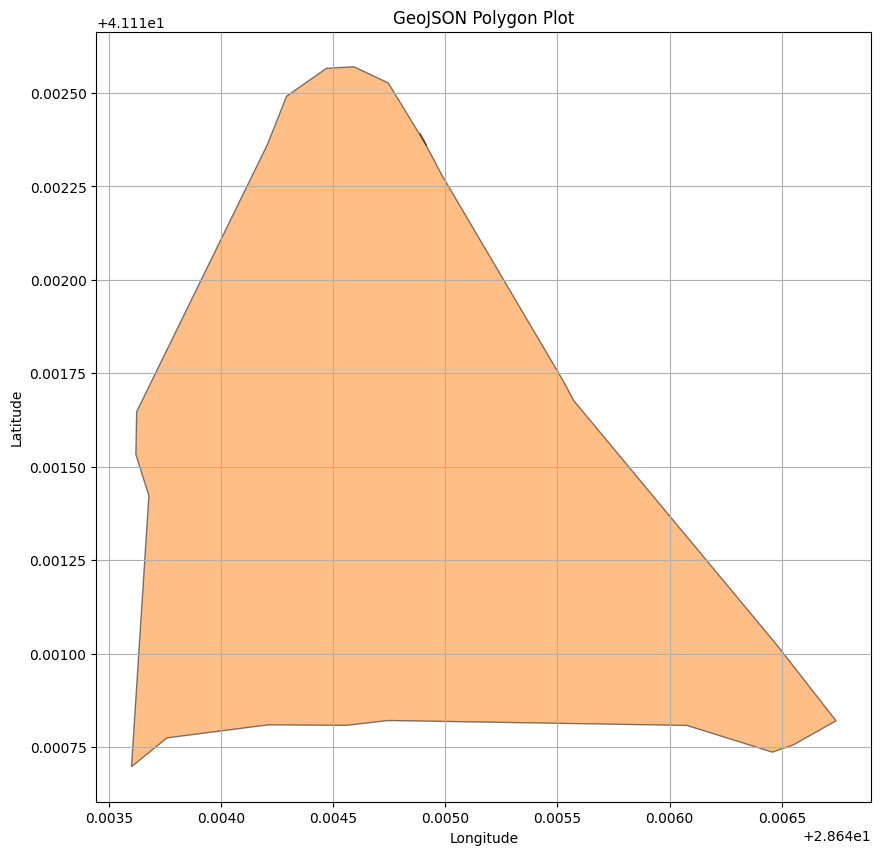

In [7]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, MultiPolygon

# Your GeoJSON data
geojson_data = {
   "features":[
      {
         "geometry":{
            "coordinates":[
               [
                  [
                     [
                        28.64490832,
                        41.11236702
                     ],
                     [
                        28.644886719,
                        41.112391586
                     ],
                     [
                        28.644915781,
                        41.112359702
                     ],
                     [
                        28.64490832,
                        41.11236702
                     ]
                  ]
               ],
               [
                  [
                     [
                        28.64490832,
                        41.11236702
                     ],
                     [
                        28.644984885,
                        41.112279951
                     ],
                     [
                        28.645525246,
                        41.111730416
                     ],
                     [
                        28.645572498,
                        41.111677263
                     ],
                     [
                        28.646481026,
                        41.111021645
                     ],
                     [
                        28.646742103,
                        41.110820825
                     ],
                     [
                        28.646553648,
                        41.110756941
                     ],
                     [
                        28.646458189,
                        41.110737021
                     ],
                     [
                        28.646076929,
                        41.110808457
                     ],
                     [
                        28.644745022,
                        41.110821611
                     ],
                     [
                        28.644560652,
                        41.1108087
                     ],
                     [
                        28.64420911,
                        41.110809934
                     ],
                     [
                        28.643758891,
                        41.110775094
                     ],
                     [
                        28.643600696,
                        41.110698038
                     ],
                     [
                        28.643678097,
                        41.111422681
                     ],
                     [
                        28.64362002,
                        41.111533424
                     ],
                     [
                        28.643623758,
                        41.11164762
                     ],
                     [
                        28.644205502,
                        41.112360713
                     ],
                     [
                        28.644292091,
                        41.11249125
                     ],
                     [
                        28.644469557,
                        41.112565863
                     ],
                     [
                        28.644592341,
                        41.112570153
                     ],
                     [
                        28.644745276,
                        41.112526959
                     ],
                     [
                        28.64490832,
                        41.11236702
                     ]
                  ]
               ]
            ],
            "type":"MultiPolygon"
         },
         "type":"Feature",
         "properties":{
            "tesis_adi":"Dr. Muhtar Ahmet Ensari Park\u0131",
            "il_adi":"\u0130STANBUL",
            "sokak_adi":"FERSAH",
            "ilce_adi":"ARNAVUTK\u00d6Y",
            "mahalle_adi":"\u00d6MERL\u0130",
            "x":28.64482684673242,
            "y":41.111454606425006,
            "id":151345359
         }
      }
   ],
   "type":"FeatureCollection"
}

# Extract coordinates
coordinates = geojson_data["features"][0]["geometry"]["coordinates"]

# Plot polygons
plt.figure(figsize=(10, 10))
for group in coordinates:
    for polygon in group:
        xs, ys = zip(*polygon)
        plt.fill(xs, ys, alpha=0.5, edgecolor='black')

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("GeoJSON Polygon Plot")
plt.grid()
plt.show()


In [1]:
import http.client
import json
import urllib.parse
import re
import pandas as pd
from shapely.geometry import Point, Polygon, MultiPolygon
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Function to parse the curl bash command into usable components
def clean_curl_request(curl_command):
    # Extract the URL
    url_pattern = r"curl '(.*?)'"
    match = re.search(url_pattern, curl_command)
    if match:
        url = match.group(1)
    else:
        raise ValueError("URL not found in the curl command")

    # Extract headers
    headers = {}
    header_pattern = r"-H '([^:]+): (.*?)'"
    for header_match in re.finditer(header_pattern, curl_command):
        header_name = header_match.group(1)
        header_value = header_match.group(2)
        headers[header_name] = header_value

    # Extract data
    data_pattern = r"--data-raw '(.*?)'"
    match = re.search(data_pattern, curl_command)
    data = {}
    if match:
        data_string = match.group(1)
        data_items = data_string.split("&")
        for item in data_items:
            key, value = item.split("=")
            data[key] = urllib.parse.unquote(value)

    # Parse URL for host and path
    parsed_url = urllib.parse.urlparse(url)
    host = parsed_url.netloc
    path = parsed_url.path + ("?" + parsed_url.query if parsed_url.query else "")

    return host, path, data, headers

In [3]:
# Function to send requests dynamically
def send_request(host, path, data, headers, lat, lng):
    # Update latitude and longitude in the data dictionary
    data["lat"] = str(lat)
    data["lng"] = str(lng)

    # Set up the connection
    connection = http.client.HTTPSConnection(host)

    # Send the POST request
    connection.request("POST", path, body=urllib.parse.urlencode(data), headers=headers)

    # Get the response
    response = connection.getresponse()
    response_data = response.read().decode()

    # Close the connection
    connection.close()

    # Check for a successful response and return the result
    if response.status == 200:
        return json.loads(response_data)
    else:
        return f"Error: {response.status}, {response_data}"

In [4]:
curl_command = """
curl 'https://www.turkiye.gov.tr/afet-ve-acil-durum-yonetimi-acil-toplanma-alani-sorgulama?harita=goster&submit' \
  -H 'Accept: application/json, text/javascript, */*; q=0.01' \
  -H 'Accept-Language: en-US,en;q=0.9' \
  -H 'Connection: keep-alive' \
  -H 'Content-Type: application/x-www-form-urlencoded; charset=UTF-8' \
  -H 'Cookie: w3p=3352537280.20480.0000; _uid=1732219586-384a1de9-4e26-4ca2-ab3d-ea0c7ce3dd86; ridbb=WyI1ZWZjYWJjN2E5YzNiY2M4ZDY4OWExMGIwN2IwMTcyMmNjZDc5NjUzYyJd; language=tr_TR.UTF-8; TURKIYESESSIONID=otcqd1hsu3nn4gfgtd321n6gjn; ajs_anonymous_id=%22dbefb214-c2e3-45e8-95e8-3f5fd4ba7ddb%22; TS015d3f68=015c1cbb6df12a832a09de4e05cf5c185e1689ea4a61939dc80a6868f3b8626fdfc9a4806568d809c2c95146a70826187e15e44c26; _lastptts=1737923693' \
  -H 'Origin: https://www.turkiye.gov.tr' \
  -H 'Referer: https://www.turkiye.gov.tr/afet-ve-acil-durum-yonetimi-acil-toplanma-alani-sorgulama?harita=goster' \
  -H 'Sec-Fetch-Dest: empty' \
  -H 'Sec-Fetch-Mode: cors' \
  -H 'Sec-Fetch-Site: same-origin' \
  -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/130.0.0.0 Safari/537.36 OPR/115.0.0.0' \
  -H 'X-Requested-With: XMLHttpRequest' \
  -H 'sec-ch-ua: "Chromium";v="130", "Opera";v="115", "Not?A_Brand";v="99"' \
  -H 'sec-ch-ua-mobile: ?0' \
  -H 'sec-ch-ua-platform: "macOS"' \
  --data-raw 'pn=%2Fafet-ve-acil-durum-yonetimi-acil-toplanma-alani-sorgulama&ajax=1&token=%7BA2FF52-2E9048-7029B4-B8AACE-12AEB8-86453C-D2370E-8FD03E%7D&islem=getAlanlarForNokta&lat=39.802224749214595&lng=32.80401706695557'
"""


# Parse the curl command
host, path, data, headers = clean_curl_request(curl_command)

In [5]:
from shapely.geometry import Polygon, MultiPolygon

def process_api_requests(latitude, longitude):
    rows = []
    try:
        result = send_request(host, path, data, headers, latitude, longitude)
        if isinstance(result, dict) and "features" in result:
            for feature in result["features"]:
                properties = feature["properties"]
                coordinates = feature["geometry"].get("coordinates", [])
                geom_type = feature["geometry"].get("type", "")

                polygon_bounds = None
                if geom_type == "Polygon" and coordinates:
                    try:
                        polygon_bounds = Polygon(coordinates[0])
                    except Exception:
                        pass
                elif geom_type == "MultiPolygon" and coordinates:
                    try:
                        polygons = [Polygon(coords[0]) for coords in coordinates]
                        polygon_bounds = MultiPolygon(polygons)
                    except Exception:
                        pass

                row = {
                    "tesis_adi": properties.get("tesis_adi", ""),
                    "il_adi": properties.get("il_adi", ""),
                    "sokak_adi": properties.get("sokak_adi", ""),
                    "ilce_adi": properties.get("ilce_adi", ""),
                    "mahalle_adi": properties.get("mahalle_adi", ""),
                    "lng": longitude,
                    "lat": latitude,
                    "id": properties.get("id", ""),
                    "polygon_bounds": polygon_bounds.wkt if polygon_bounds else None,
                }
                rows.append(row)
    except Exception as e:
        print(f"Error processing point ({latitude}, {longitude}): {e}")
    df = pd.DataFrame(rows, columns=columns)
    
    return rows

In [6]:
columns = ["tesis_adi", "il_adi", "sokak_adi", "ilce_adi", "mahalle_adi", "lng", "lat", "id", "polygon_bounds"]


In [7]:
rows = []



In [8]:
missing_zones = pd.read_csv('./Missing Assembly Zones - EPSG 32635  UTM zone 35N - Missing Assembly Zones - EPSG 32635  UTM zone 35N.csv')


In [9]:
for index,row in missing_zones.iterrows():
    print(row['lat'],row['lng'])
    rows.extend(process_api_requests(row['lat'],row['lng']))

df = pd.DataFrame(rows, columns=columns)


40.87228196 29.3350615
40.875783 29.22256953
41.06166179 28.86751302
41.01782913 29.02224119
41.07842712 28.99573237
41.06463875 28.95536632
41.03673738 28.84539978
41.17382253 28.69007522
41.07781099 28.98033125
41.10053952 28.65261565
41.04425321 29.09856786
41.02489712 28.69771494
41.03569332 28.8894481
40.880962 29.34592316
41.00475118 29.1937124
40.88358504 29.23568419
41.04172653 29.0811601
40.82801301 29.36343623
41.02070312 29.01785344
41.03013063 28.89594096
41.04078543 28.96132642
40.83070794 29.36462365
41.02160143 29.02023488
40.82801301 29.36462341
41.03604397 28.54756026
40.83841139 29.30426167
40.92697976 29.35564562
41.06578731 28.25368181
40.90985273 29.18193614
41.04516301 29.10169046
41.03782754 28.96597192
41.07334136 28.81575792
40.90862402 29.18564619
41.09863672 28.63984987
41.00424173 28.62931351
41.01142822 28.62693437
41.02579543 28.69771504
41.04352316 29.07996926
41.03340203 28.96598591
41.01243692 28.9646992
41.11191291 28.72617723
41.02612186 28.70255818
4

In [10]:
df.tail()

,tesis_adi,il_adi,sokak_adi,ilce_adi,mahalle_adi,lng,lat,id,polygon_bounds
598,Ayhan Kocaman Parkı,İSTANBUL,KULAKSIZ,BEYOĞLU,KULAKSIZ,28.962517,41.040785,151346866,"POLYGON ((28.961758497 41.037628975, 28.961831..."
599,Haşim Osman Cami Bahçesi,İSTANBUL,KULAKSIZ,BEYOĞLU,KULAKSIZ,28.962517,41.040785,151346865,"MULTIPOLYGON (((28.963477551 41.036704593, 28...."
600,Yıldız Teknik Üniversitesi Davutpaşa Kampüsü (...,İSTANBUL,ŞEHİT ORGENERAL EŞREF BİTLİS,GÜNGÖREN,GENÇOSMAN,28.887804,41.019123,151347363,"MULTIPOLYGON (((28.894363595 41.023728769, 28...."
601,Saadet Sokak İspark,İSTANBUL,ŞEHİT ORGENERAL EŞREF BİTLİS,GÜNGÖREN,SANAYİ,28.887804,41.019123,151347959,"POLYGON ((28.887143299 41.020214934, 28.887104..."
602,Eski Londra Asfaltı Askerlik Şubesi Karşısı Ye...,İSTANBUL,ESKİ LONDRA ASFALTI,ESENLER,ÇİFTE HAVUZLAR,28.887804,41.019123,151348027,"POLYGON ((28.885617127 41.017678693, 28.885797..."


In [11]:
df_cleaned = df.drop_duplicates(subset=["tesis_adi", "id"],keep='first')
df_cleaned.tail()

,tesis_adi,il_adi,sokak_adi,ilce_adi,mahalle_adi,lng,lat,id,polygon_bounds
575,Atatürk Spor Kompleksi,İSTANBUL,GÖLBOYU,BÜYÜKÇEKMECE,DİZDARİYE,28.584327,41.061493,151347014,"POLYGON ((28.588990443 41.027989908, 28.588245..."
577,Alkent 2000 Yeşil Alan,İSTANBUL,ULU,BÜYÜKÇEKMECE,KARAAĞAÇ,28.622498,41.105510,151347022,"POLYGON ((28.617361592 41.088521648, 28.618168..."
582,Deprem Konutları Meydan Parkı,İSTANBUL,HÜRRİYET,BAŞAKŞEHİR,BAŞAK,28.795982,41.112045,151346340,"POLYGON ((28.800113602 41.112621746, 28.800154..."
583,565. Ada Parkı,İSTANBUL,KALENDER,BAŞAKŞEHİR,BAŞAKŞEHİR,28.795982,41.112045,151346343,"POLYGON ((28.789073338 41.110284683, 28.788940..."
588,Şehit Polis Hasan Koçer Parkı,İSTANBUL,KIRMIZIGÜL,KAĞITHANE,ORTABAYIR,29.002053,41.076565,151348222,"POLYGON ((29.003567461 41.077471874, 29.003513..."


In [18]:
df_cleaned.to_csv('./results/error.csv',index=False)